[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

[1] 1250    9

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

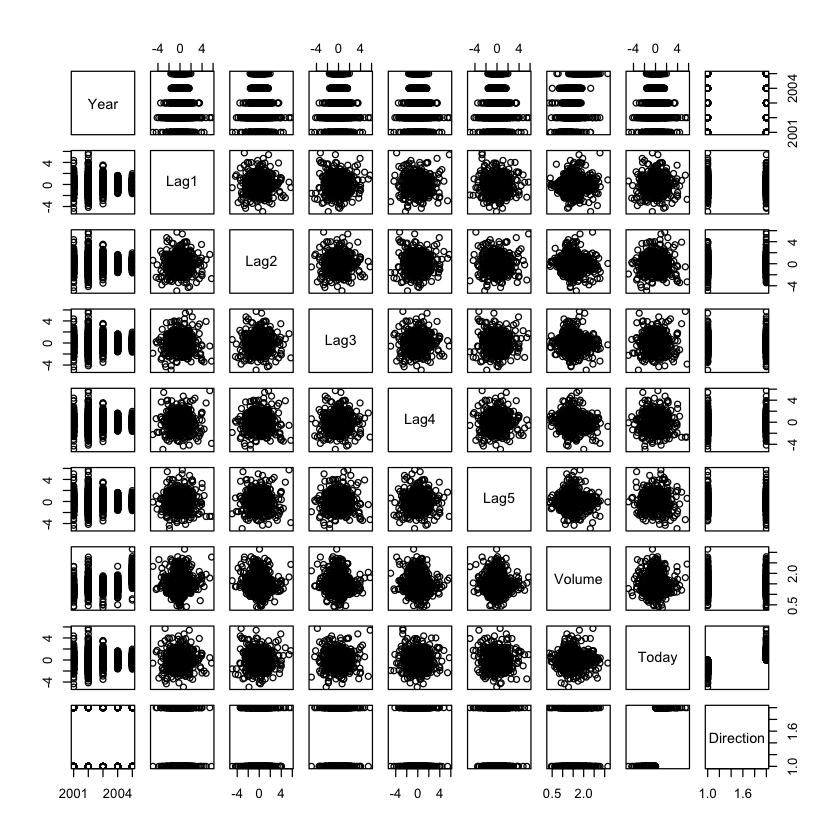

In [3]:
# Chapter 4 Lab: Logistic Regression, LDA, QDA, and KNN

# The Stock Market Data

library(ISLR)
names(Smarket)
dim(Smarket)
summary(Smarket)
pairs(Smarket)

In [5]:
cor(Smarket)

ERROR: Error in cor(Smarket): 'x' must be numeric


In [6]:
cor(Smarket[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


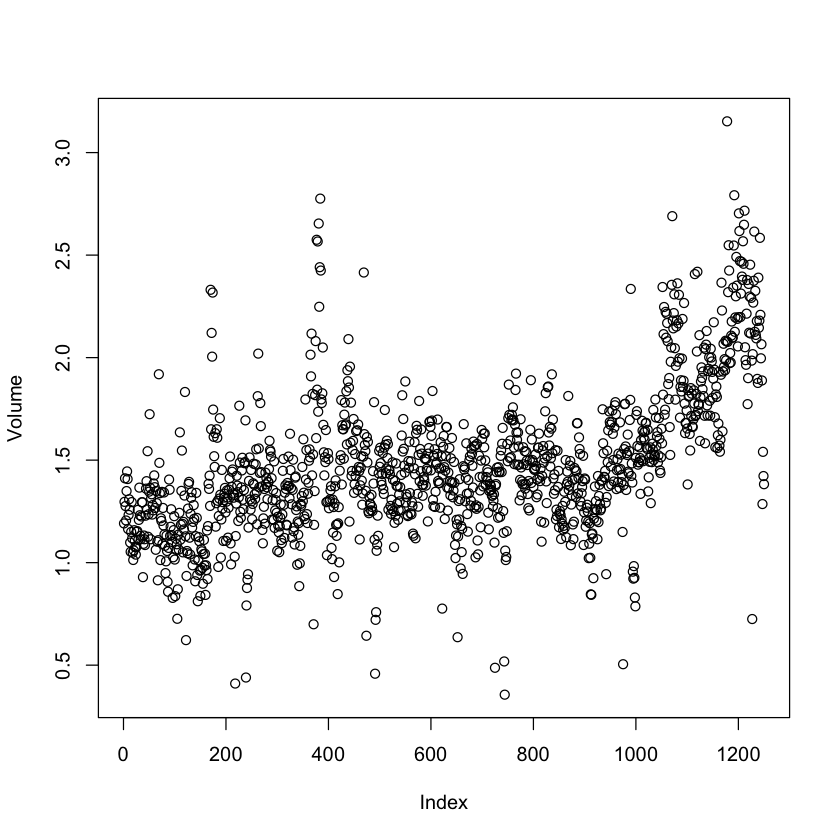

In [7]:
attach(Smarket)
plot(Volume)

In [8]:
# Logistic Regression

glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial)
summary(glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [9]:
coef(glm.fits)
summary(glm.fits)$coef
summary(glm.fits)$coef[,4]

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

In [10]:
glm.probs=predict(glm.fits,type="response")
glm.probs[1:10]
contrasts(Direction)

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

,Up
Down,0
Up,1


In [11]:
glm.pred=rep("Down",1250)
glm.pred[glm.probs>.5]="Up"

In [12]:
table(glm.pred,Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [13]:
mean(glm.pred==Direction)

[1] 0.5216

In [14]:
train=(Year<2005)
Smarket.2005=Smarket[!train,]
dim(Smarket.2005)

[1] 252   9

In [15]:
Direction.2005=Direction[!train]

In [16]:
glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fits,Smarket.2005,type="response")

In [17]:
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [18]:
mean(glm.pred==Direction.2005)
mean(glm.pred!=Direction.2005)

[1] 0.4801587

[1] 0.5198413

In [19]:
glm.fits=glm(Direction~Lag1+Lag2,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fits,Smarket.2005,type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [20]:
mean(glm.pred==Direction.2005)

[1] 0.5595238

In [21]:
predict(glm.fits,newdata=data.frame(Lag1=c(1.2,1.5),Lag2=c(1.1,-0.8)),type="response")

1         2 
0.4791462 0.4960939

In [95]:
# Linear Discriminant Analysis

library(MASS)
lda.fit=lda(Direction~Lag1+Lag2,data=Smarket,subset=train)
lda.fit
names(lda.fit)

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

[1] "prior"   "counts"  "means"   "scaling" "lev"     "svd"     "N"      
 [8] "call"    "terms"   "xlevels"

In [ ]:
plot(lda.fit)

In [48]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)
head(lda.pred$class)
head(lda.pred$posterior)
head(lda.pred$x)

[1] "class"     "posterior" "x"

[1] Up Up Up Up Up Up
Levels: Down Up

,Down,Up
999,0.4901792,0.5098208
1000,0.4792185,0.5207815
1001,0.4668185,0.5331815
1002,0.4740011,0.5259989
1003,0.4927877,0.5072123
1004,0.4938562,0.5061438


,LD1
999,0.08293096
1000,0.59114102
1001,1.16723063
1002,0.83335022
1003,-0.03792892
1004,-0.08743142


In [24]:
lda.class=lda.pred$class
table(lda.class,Direction.2005)
mean(lda.class==Direction.2005)


         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

In [25]:
sum(lda.pred$posterior[,1]>=.5)
sum(lda.pred$posterior[,1]<.5)

[1] 70

[1] 182

In [27]:
lda.pred$posterior[1:20,1]
lda.class[1:20]

999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331

[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up

In [28]:
sum(lda.pred$posterior[,1]>.9)

[1] 0

In [29]:
# Quadratic Discriminant Analysis

qda.fit=qda(Direction~Lag1+Lag2,data=Smarket,subset=train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [30]:
qda.class=predict(qda.fit,Smarket.2005)$class
table(qda.class,Direction.2005)
mean(qda.class==Direction.2005)

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

[1] 0.5992063

In [31]:
# K-Nearest Neighbors

library(class)
train.X=cbind(Lag1,Lag2)[train,]
test.X=cbind(Lag1,Lag2)[!train,]
train.Direction=Direction[train]

In [32]:
set.seed(1)
knn.pred=knn(train.X,test.X,train.Direction,k=1)
table(knn.pred,Direction.2005)
(83+43)/252


        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

In [33]:
knn.pred=knn(train.X,test.X,train.Direction,k=3)
table(knn.pred,Direction.2005)
mean(knn.pred==Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

[1] 0.5357143

In [34]:
# An Application to Caravan Insurance Data
# This data set includes 85 predictors that measure demographic 
# characteristics for 5,822 individuals. 
# The response variable isPurchase, which indicates whether or 
# not a given individual purchases a caravan insurance policy. 
# In this data set, only 6% of people purchased.
# caravan insurance. 
dim(Caravan)
attach(Caravan)
summary(Purchase)
348/5822

[1] 5822   86

No  Yes 
5474  348

[1] 0.05977327

In [35]:
head(Caravan)

MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,⋯,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
33,1,3,2,8,0,5,1,3,7,⋯,0,0,0,1,0,0,0,0,0,No
37,1,2,2,8,1,4,1,4,6,⋯,0,0,0,1,0,0,0,0,0,No
37,1,2,2,8,0,4,2,4,3,⋯,0,0,0,1,0,0,0,0,0,No
9,1,3,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,No
40,1,4,2,10,1,4,1,4,7,⋯,0,0,0,1,0,0,0,0,0,No
23,1,2,1,5,0,5,0,5,0,⋯,0,0,0,0,0,0,0,0,0,No


In [36]:
# In standardizing the data, we exclude column 86, because that is the
# qualitative Purchase variable.
standardized.X=scale(Caravan[,-86])
var(Caravan[,1])
var(Caravan[,2])
var(standardized.X[,1])
var(standardized.X[,2])


[1] 165.0378

[1] 0.1647078

[1] 1

[1] 1

In [37]:
# Create training and testing data sets
test=1:1000
train.X=standardized.X[-test,]
test.X=standardized.X[test,]
train.Y=Purchase[-test]
test.Y=Purchase[test]

In [41]:
set.seed(1)
knn.pred=knn(train.X,test.X,train.Y,k=1)
mean(test.Y!=knn.pred)
#The KNN error rate on the
#1,000 test observations is just under 12%. At first glance, this may appear
#to be fairly good. However, since only 6% of customers purchased
#insurance, we could get the error rate down to 6% by always predicting No
#regardless of the values of the predictors!
mean(test.Y!="No")

[1] 0.118

[1] 0.059

In [42]:
#It turns out that KNN with K = 1 does far better than random guessing
#among the customers that are predicted to buy insurance. Among 77 such
#customers, 9, or 11.7%, actually do purchase insurance. This is double the
#rate that one would obtain from random guessing.
table(knn.pred,test.Y)
9/(68+9)

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

[1] 0.1168831

In [43]:
#Using K = 3, the success rate increases to 19 %, and with K = 5 the rate is
#26.7%. This is over four times the rate that results from random guessing.
#It appears that KNN is finding some real patterns in a difficult data set!
knn.pred=knn(train.X,test.X,train.Y,k=3)
table(knn.pred,test.Y)
5/26
knn.pred=knn(train.X,test.X,train.Y,k=5)
table(knn.pred,test.Y)
4/15

        test.Y
knn.pred  No Yes
     No  920  54
     Yes  21   5

[1] 0.1923077

        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4

[1] 0.2666667

In [44]:
#As a comparison, we can also fit a logistic regression model to the data.
#If we use 0.5 as the predicted probability cut-off for the classifier, then
#we have a problem: only seven of the test observations are predicted to
#purchase insurance. Even worse, we are wrong about all of these! However,
#we are not required to use a cut-off of 0.5. If we instead predict a purchase
#any time the predicted probability of purchase exceeds 0.25, we get much
#better results: we predict that 33 people will purchase insurance, and we
#are correct for about 33% of these people. This is over five times better
#than random guessing!
glm.fits=glm(Purchase~.,data=Caravan,family=binomial,subset=-test)
glm.probs=predict(glm.fits,Caravan[test,],type="response")
glm.pred=rep("No",1000)
glm.pred[glm.probs>.5]="Yes"
table(glm.pred,test.Y)
glm.pred=rep("No",1000)
glm.pred[glm.probs>.25]="Yes"
table(glm.pred,test.Y)
11/(22+11)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

        test.Y
glm.pred  No Yes
     No  934  59
     Yes   7   0

        test.Y
glm.pred  No Yes
     No  919  48
     Yes  22  11

[1] 0.3333333